In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from numpy import sqrt, pi, exp, linspace, loadtxt
from lmfit import  Model
import tkinter as tk
import math
from pathlib import Path
import os
import numpy as np
import csv
from scipy.optimize import curve_fit
# from sympy import *
%matplotlib widget

def displayall ():   
    root = tk.Tk()
    root.wm_attributes('-topmost', True)
    path = filedialog.askdirectory()
    root.withdraw()
    return path

In [2]:
def gaussian(x, amp, cen, wid):
    "1-d gaussian: gaussian(x, amp, cen, rad)"
    return (2*amp/(pi*wid**2)) * exp(-2*(x-cen)**2 /(wid**2))

def nodiff(x, P, w, Poff, x0):
    return (Poff + P/2 * (1-math.erf(sqrt(2)*(x-x0) / w )))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 79
    # data points      = 157
    # variables        = 3
    chi-square         = 11764.6829
    reduced chi-square = 76.3940447
    Akaike info crit   = 683.708012
    Bayesian info crit = 692.876749
[[Variables]]
    amp: -62449717.2 +/- 2350627.98 (3.76%) (init = -6000)
    cen:  2450.70727 +/- 6.51185768 (0.27%) (init = 2400)
    wid:  573.793024 +/- 13.0237157 (2.27%) (init = 100)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) = -0.905
PARAMETER WID IS RADIUS OF BEAM AT 1/e^2


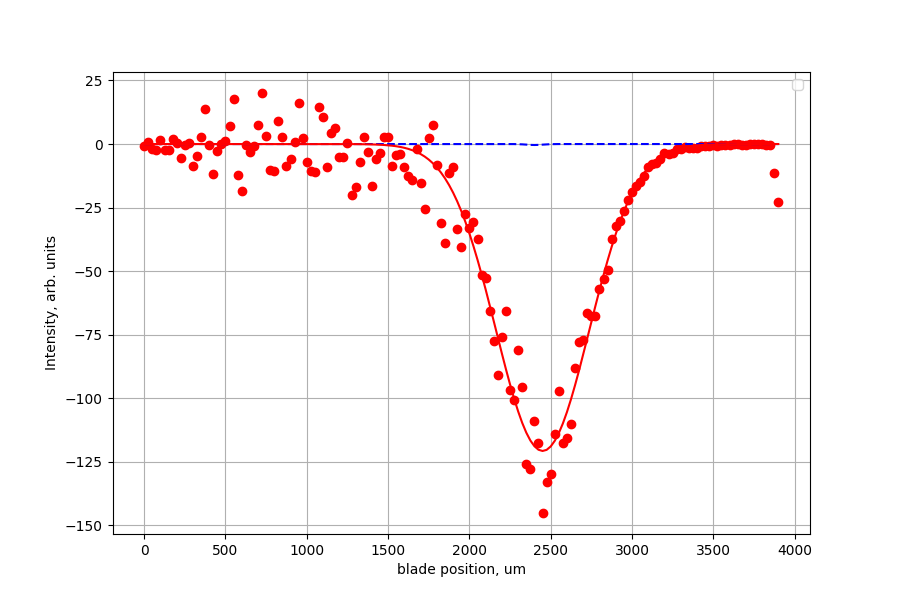

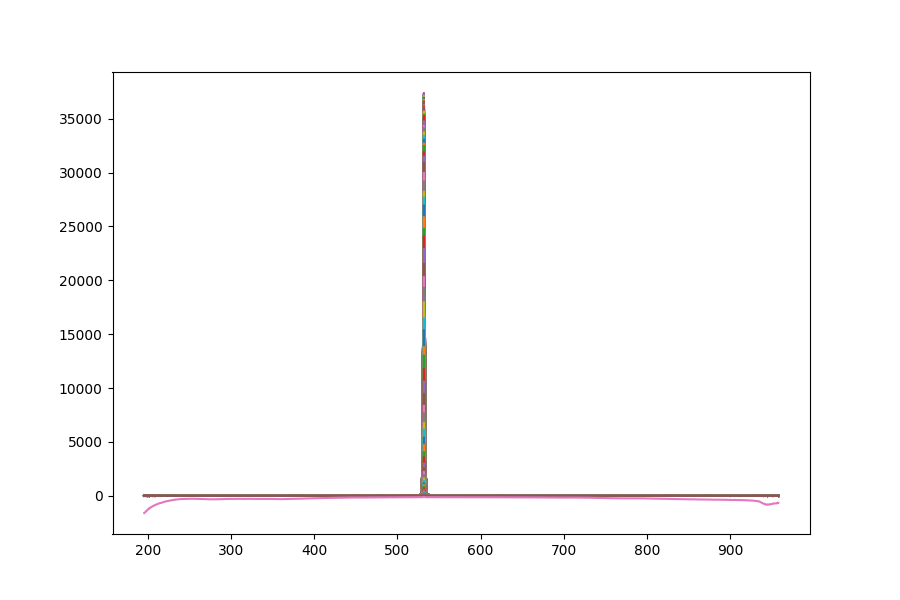

In [4]:
path = r'C:\Users\manvy\Desktop\FTMC\Duomenys'
dates = '20221222_532mm_75cm_spotsize\\90o-kampu X'
comment = ''
stepsize = 25 #Microns
#Initial guessing parameters
Integrate_from = 530
Integrate_to = 534
amp=-6000
cen=2400
wid=100
P = 100000
fig1 = plt.figure(figsize = (9,6))
filenames = os.listdir(path + "\\" + dates)
filename = [f for f in filenames if ".txp" in f]
names = [os.path.join(path + "\\" + dates, basename) for basename in filename]
names.sort(key=lambda x: os.path.getmtime(x))
step = []
Intensities = []

for f in names:
    df = pd.read_csv(f, sep='\t')
    df.columns = ['WL', 'SAMPLE']
    # df['SAMPLE'] = df['SAMPLE']/(20/1000)
    dfw = df.copy()
    plt.plot(df['WL'], df['SAMPLE'])
    dfw = dfw[dfw['WL'] < Integrate_to]
    dfw = dfw[dfw['WL'] > Integrate_from]
    # dfw['SAMPLE'].apply
    Intensity = float(np.trapz([dfw['SAMPLE']]))
    # if Itensity
    Intensities.append(Intensity)
fl = len(names)
step = list(range(len(names)))

stepf = [a * stepsize for a in step]
# dy = Intensities.diff(stepf)
dy = np.gradient(Intensities, stepf)
# dydx = [a * -1 for a in dydx]

# stepf = np.asarray(stepf)
# dydx = np.asarray(dydx)

# Gauss Fit
gmod = Model(gaussian)
result = gmod.fit(dy, x=stepf, amp=amp, cen=cen, wid=wid)


# test_list  = [stepf, Intensities]
# dfx = pd.DataFrame(test_list, index=['step', 'intensities']).T
# csvname = os.path.join(path + "\\" + dates)
# dfx.to_csv(csvname + "kinetics.csv", index=None)

# 
# gmod = Model(nodiff)
# result = gmod.fit(Intensities, P = P, x=stepf, Poff=amp, x0=cen, w=wid)

    # WRITE CSV
test_list  = [stepf, dy]
dfx = pd.DataFrame(test_list, index=['step', 'intensity']).T
csvname = os.path.join(path + "\\" + dates)
dfx.to_csv(csvname + "data.csv", index=None)

fig2 = plt.figure(figsize = (9,6))
plt.legend()
print(result.fit_report())

# plt.plot(stepf, Intensities,         'bo')
plt.plot(stepf, dy,         'ro')
plt.plot(stepf, result.init_fit, 'b--')
plt.plot(stepf, result.best_fit, 'r-')
print('PARAMETER WID IS RADIUS OF BEAM AT 1/e^2')

amplitude = result.params['amp'].value
center = result.params['cen'].value
radius = result.params['wid'].value

# plt.scatter(stepf, dydx)
# plt.yscale('log'); plt.xscale('log'); 
plt.grid(); plt.xlabel('blade position, um'); plt.ylabel('Intensity, arb. units')
# print('Total Samples:', powers)
# unique = [x for x in namef if x not in used and (used.add(x) or True)]
plt.show()

# THIS SECTION WRITES USER PARAMETERS FILE
now = datetime.datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
headerList = ['Time', 'Filename', 'Amplitude', 'Center', 'Radius', 'Step size', 'Integrate from', 'Integrate to', 'comment']
parameters_list  = [now, dates, amplitude, center, radius, stepsize, Integrate_from, Integrate_to, comment]
csvname = os.path.join(path + "\\" + dates + "\\" + 'Fitting parameters.csv')
if not os.path.exists(csvname):
    with open(csvname, 'a', newline='') as csvfile:
        resultwriter = csv.writer(csvfile, delimiter=',')
        resultwriter.writerow(headerList)
        resultwriter.writerow(parameters_list)
else:
    with open(csvname, 'a', newline='') as csvfile:
        resultwriter = csv.writer(csvfile, delimiter=',')
        resultwriter.writerow(parameters_list)